In [1]:
from numpy import *
from matplotlib import pyplot as plt
import sys
import numpy as np

In [2]:
def loadDataSet(fileName = 'iyer.csv'):
    dataMat=[]
    labelMat=[]
    fr = open(fileName)
    for line in fr.readlines():
        lineArray=line.strip().split(',')
        records = []
        for attr in lineArray[:-1]:
            records.append(float(attr))
        dataMat.append(records)
        labelMat.append(int(lineArray[-1]))
    dataMat = array(dataMat)
    
    labelMat = array(labelMat)
    
    
    return dataMat,labelMat

In [3]:
def pca(dataMat, PC_num=2):
    '''
    Input:
        dataMat: obtained from the loadDataSet function, each row represents an observation
                 and each column represents an attribute
        PC_num:  The number of desired dimensions after applyting PCA. In this project keep it to 2.
    Output:
        lowDDataMat: the 2-d data after PCA transformation
    '''
    x_prime= dataMat- dataMat.mean(axis=0)
    cov_mat= (x_prime.T@x_prime)/(len(x_prime)-1)
    eig_value,eig_vector= np.linalg.eig(cov_mat)
    mul_vector= np.delete(eig_vector,[2,3], axis=1)
    lowDDataMat= x_prime@mul_vector
    
    
    
    
    
    return array(lowDDataMat)

In [4]:
def plot(lowDDataMat, labelMat, figname):
    '''
    Input:
        lowDDataMat: the 2-d data after PCA transformation obtained from pca function
        labelMat: the corresponding label of each observation obtained from loadData
    '''
    plt.scatter(lowDDataMat[:,0],lowDDataMat[:,1],c=labelMat)
    
    

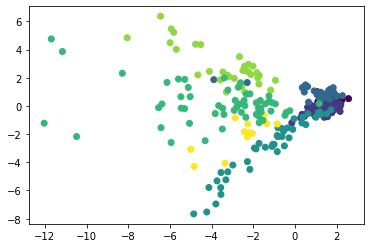

In [8]:
if __name__ == '__main__':
    if len(sys.argv) == 2:
        filename = sys.argv[1]
    else:
        filename = 'iyer.csv'
    figname = filename
    figname = figname.replace('csv','jpg')
    dataMat, labelMat = loadDataSet(filename)
    
    lowDDataMat = pca(dataMat)
    
    plot(lowDDataMat, labelMat, figname)